# FINAL PROJECT
## PREDICTING CREDIT RISK USING GERMAN CREDIT DATA:

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import pydot

## Data Exploration and Preperation

In [62]:
data=pd.read_csv("german_credit_data.csv")

In [63]:
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [64]:
data["Risk"].unique()
print("Good",len(data[data["Risk"]== "good"]))
print("Bad",len(data[data["Risk"]== "bad"]))


Good 700
Bad 300


#### Here we notice that the data given has 700 oservations as good and 300 0bservations as bad risk

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### As we see here we arent given the entire information about the savings and checking accounts. Also there are few users about whom we have the information of both savings and checking accounts.

In [66]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [67]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [68]:
data=data.drop("Unnamed: 0",axis=1)


In [69]:
for i in data.columns:
    print(i,data[i].isnull().sum())

Age 0
Sex 0
Job 0
Housing 0
Saving accounts 183
Checking account 394
Credit amount 0
Duration 0
Purpose 0
Risk 0


In [70]:
data["Saving accounts"]=data["Saving accounts"].fillna(0)
data["Checking account"]=data["Checking account"].fillna(0)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,0,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,0,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [71]:
data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


#### As noticed earlier too we have null values in savings and checking accounts, we consider that there are few account holder who only have checking accounts and few who have only savings . Hence we donot remove those observations but rather make them zeroes for future analysis. Also since we have few variables as string values we cannot find the correlation between those variables. Further as we also use classification techniques , we need to scale the variables for better performance of the model , we replace these variables with float/ int values

In [72]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,0,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,0,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,0,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,0,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [73]:
data["Sex"].unique()
data["Housing"].unique()
data["Saving accounts"].unique()
data["Checking account"].unique()
data["Purpose"].unique()


array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [74]:
Gender={"female":1,"male":2}
Risk={"good":0,"bad":1}
House={'own':1, 'free':2, 'rent':3}
savings_account ={'little':2, 'quite rich':3, 'rich':4, 'moderate':5}
checking_account ={'little':2, 'rich':4, 'moderate':5}
purpose={'radio/TV':1, 'education':2, 'furniture/equipment':3, 'car':4, 'business':5,
       'domestic appliances':6, 'repairs':7, 'vacation/others':8}
data["Sex"]=data["Sex"].map(Gender)
data["Risk"]=data["Risk"].map(Risk)
data["Housing"]=data["Housing"].map(House)

data["Saving accounts"]=data["Saving accounts"].map(savings_account)
data["Checking account"]=data["Checking account"].map(checking_account)
data["Purpose"]=data["Purpose"].map(purpose)

In [75]:
data["Saving accounts"]=data["Saving accounts"].fillna(0).astype(int)
data["Checking account"]=data["Checking account"].fillna(0).astype(int)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,2,2,1,0,2,1169,6,1,0
1,22,1,2,1,2,5,5951,48,1,1
2,49,2,1,1,2,0,2096,12,2,0
3,45,2,2,2,2,2,7882,42,3,0
4,53,2,2,2,2,2,4870,24,4,1
...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,1,2,0,1736,12,3,0
996,40,2,3,1,2,2,3857,30,4,0
997,38,2,2,1,2,0,804,12,1,0
998,23,2,2,2,2,2,1845,45,1,1


In [78]:
data.corr()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Age,1.000000,0.161694,0.015673,-0.108437,-0.078007,-0.071355,0.032716,-0.036136,0.071069,-0.091127
Sex,0.161694,1.000000,0.070298,-0.179137,-0.031938,-0.022135,0.093482,0.081432,0.051436,-0.075493
Job,0.015673,0.070298,1.000000,0.015201,-0.025748,-0.039515,0.285385,0.210910,0.024629,0.032735
Housing,-0.108437,-0.179137,0.015201,1.000000,0.017183,0.037102,0.056119,0.011950,0.041964,0.123815
Saving accounts,-0.078007,-0.031938,-0.025748,0.017183,1.000000,0.087139,-0.079293,-0.027849,0.049024,0.048081
Checking account,-0.071355,-0.022135,-0.039515,0.037102,0.087139,1.000000,0.072400,0.069970,0.060317,0.220213
Credit amount,0.032716,0.093482,0.285385,0.056119,-0.079293,0.072400,1.000000,0.624984,0.214513,0.154739
Duration,-0.036136,0.081432,0.210910,0.011950,-0.027849,0.069970,0.624984,1.000000,0.105524,0.214927
Purpose,0.071069,0.051436,0.024629,0.041964,0.049024,0.060317,0.214513,0.105524,1.000000,0.090001
Risk,-0.091127,-0.075493,0.032735,0.123815,0.048081,0.220213,0.154739,0.214927,0.090001,1.000000


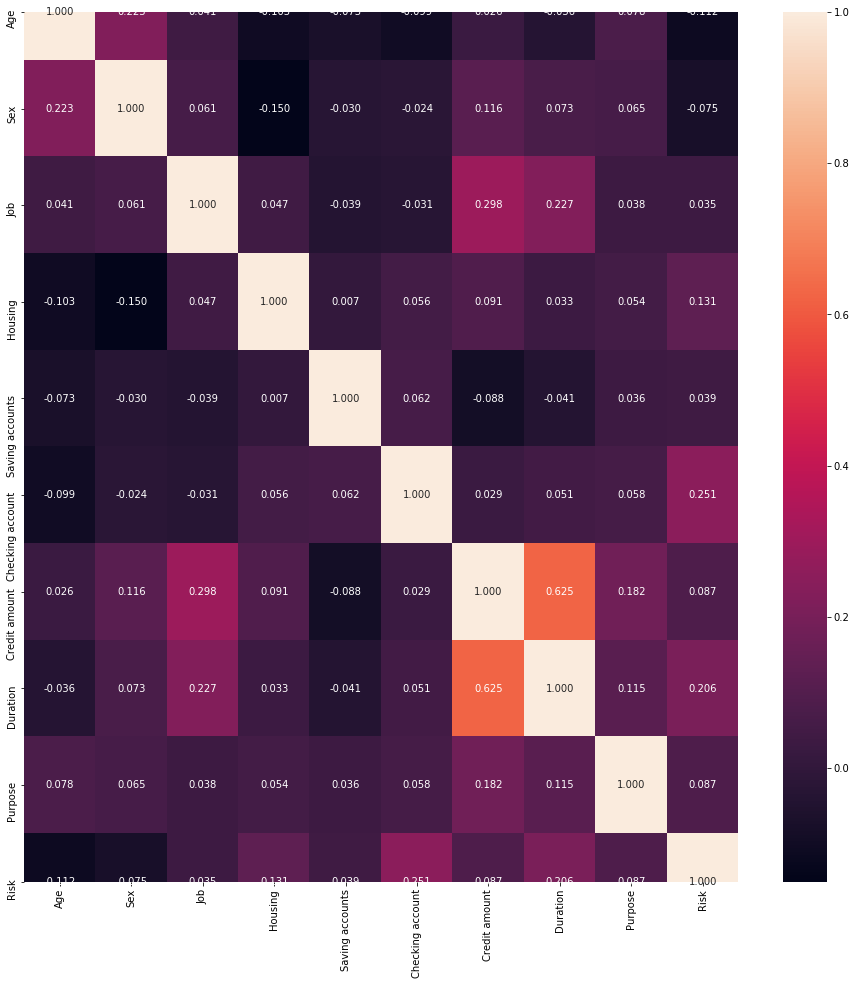

In [79]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(data=data.corr(method='spearman'), annot=True, ax=ax, fmt ='.3f')

## Data Visualisation

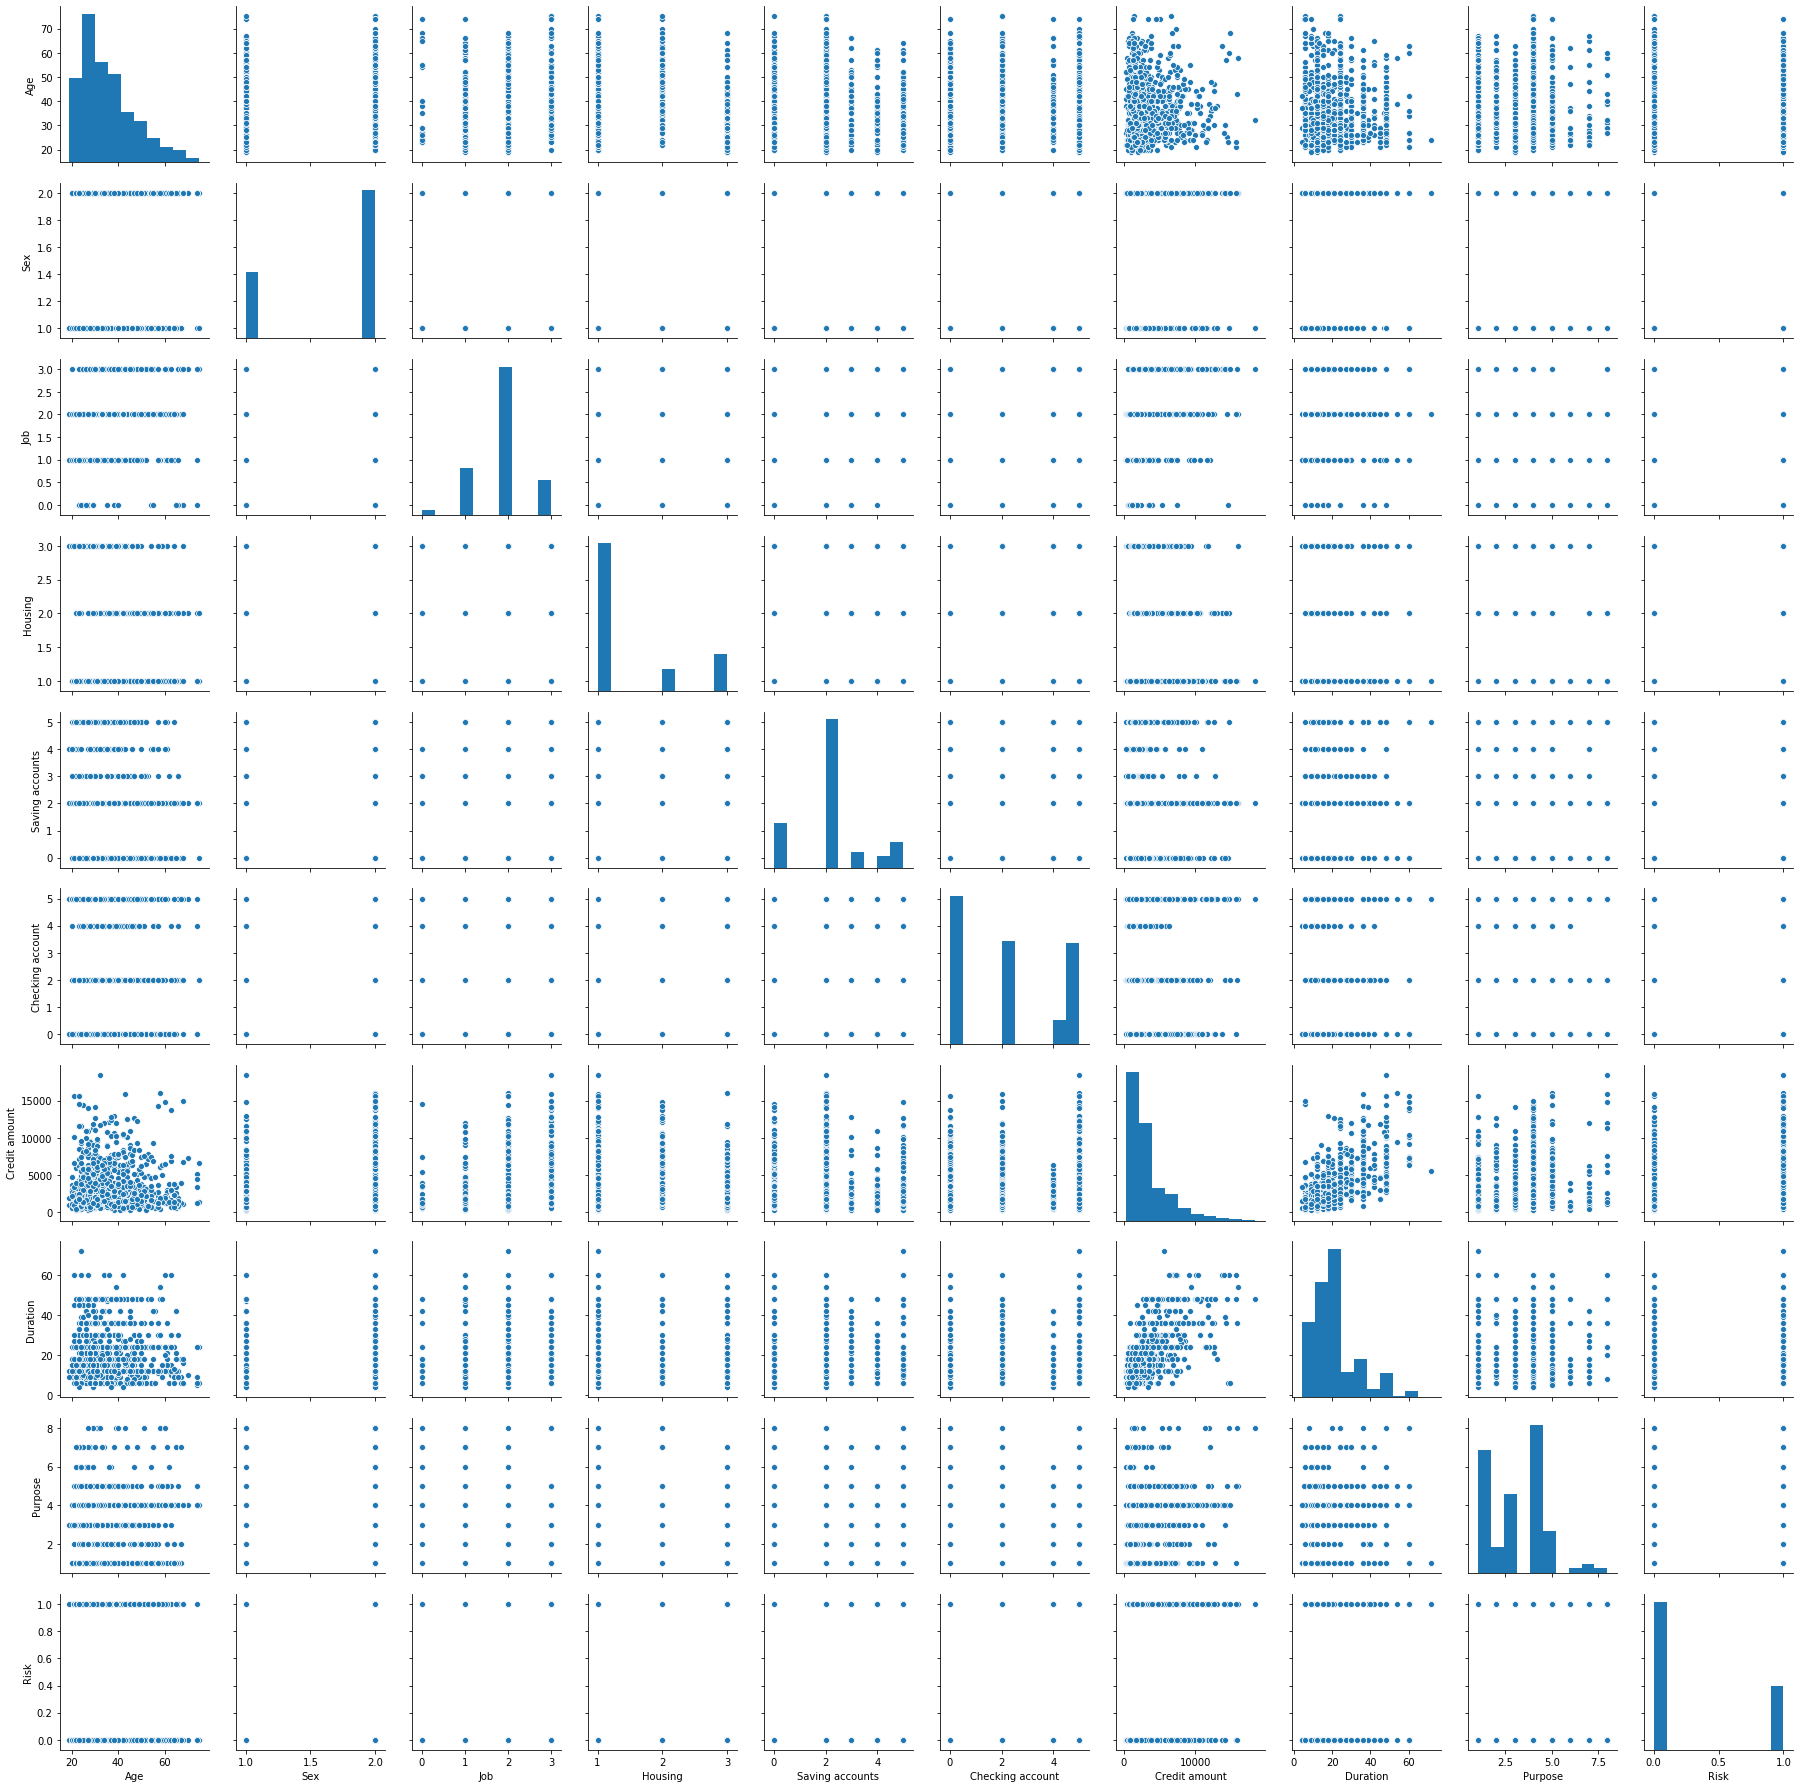

In [80]:
sns.pairplot(data)

<Figure size 4356x3996 with 0 Axes>

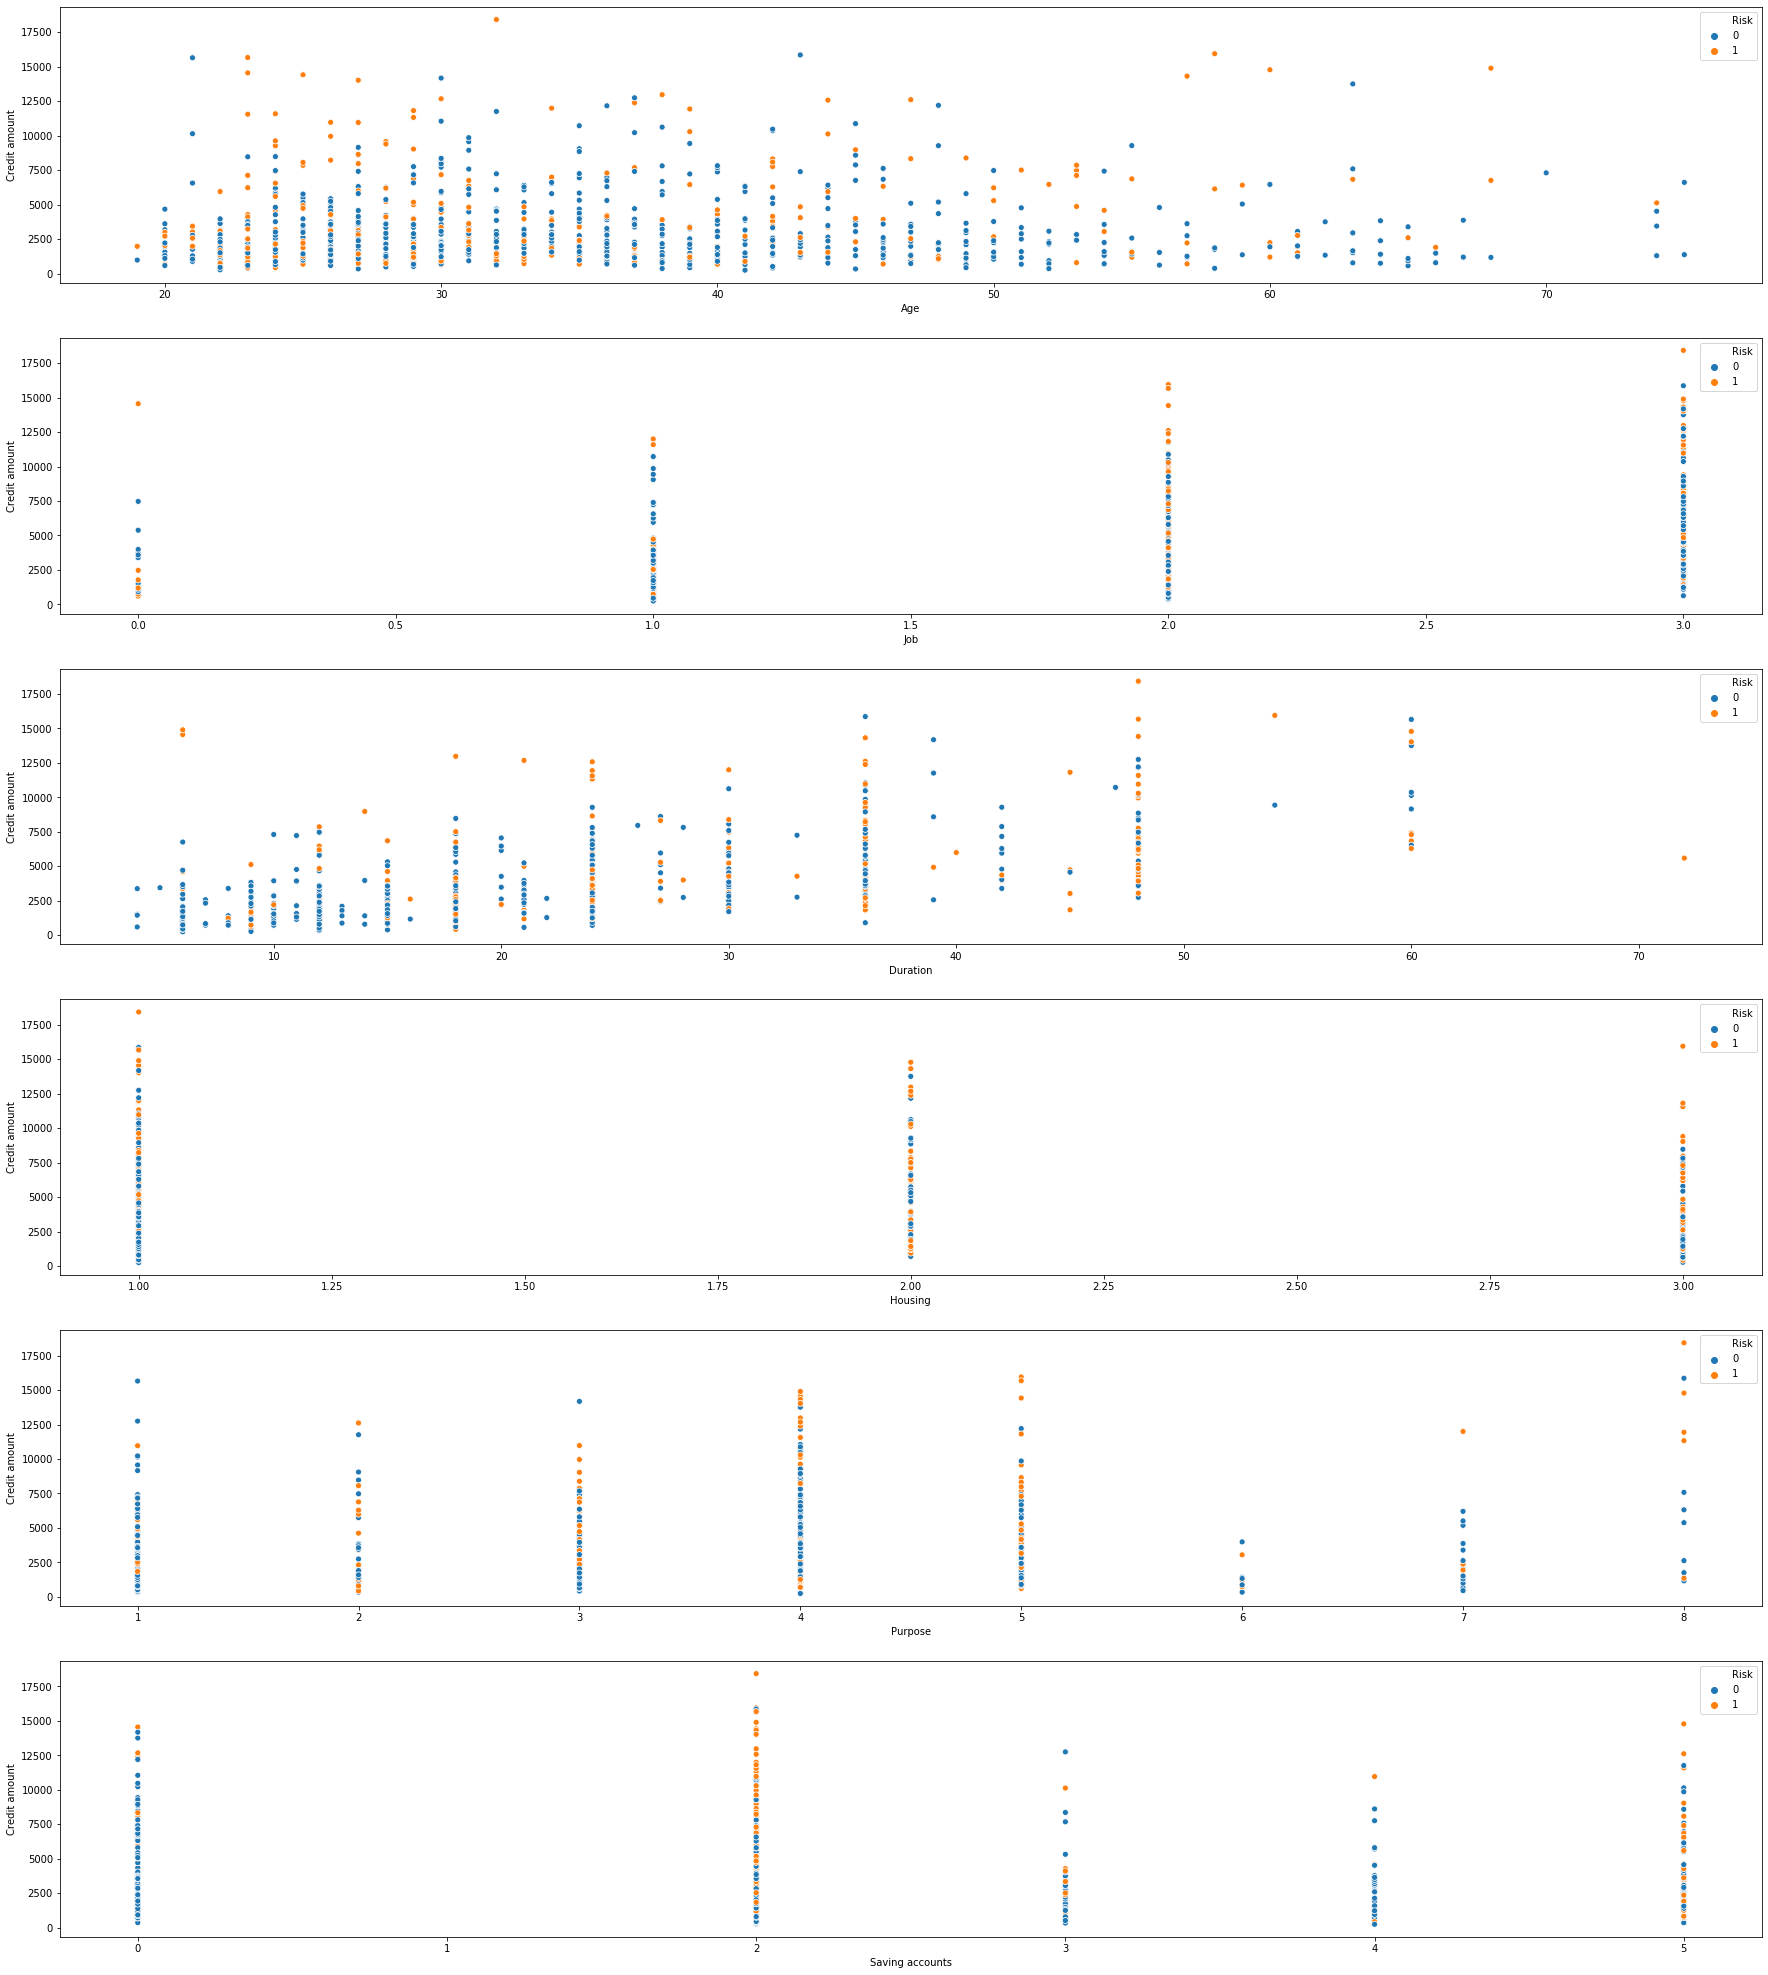

<Figure size 4356x3996 with 0 Axes>

In [81]:
plt.figure( figsize=(30.5,35.5))
plt.subplot(6, 1, 1)
sns.scatterplot(x="Age",y="Credit amount",hue="Risk",data=data)
plt.subplot(6, 1, 2)
sns.scatterplot(x="Job",y="Credit amount",hue="Risk",data=data)
plt.subplot(6, 1,3)
sns.scatterplot(x="Duration",y="Credit amount",hue="Risk",data=data)
plt.subplot(6, 1,4)
sns.scatterplot(x="Housing",y="Credit amount",hue="Risk",data=data)
plt.subplot(6, 1, 5)
sns.scatterplot(x="Purpose",y="Credit amount",hue="Risk",data=data)
plt.subplot(6, 1, 6)
sns.scatterplot(x="Saving accounts",y="Credit amount",hue="Risk",data=data)
plt.figure( figsize=(60.5,55.5))


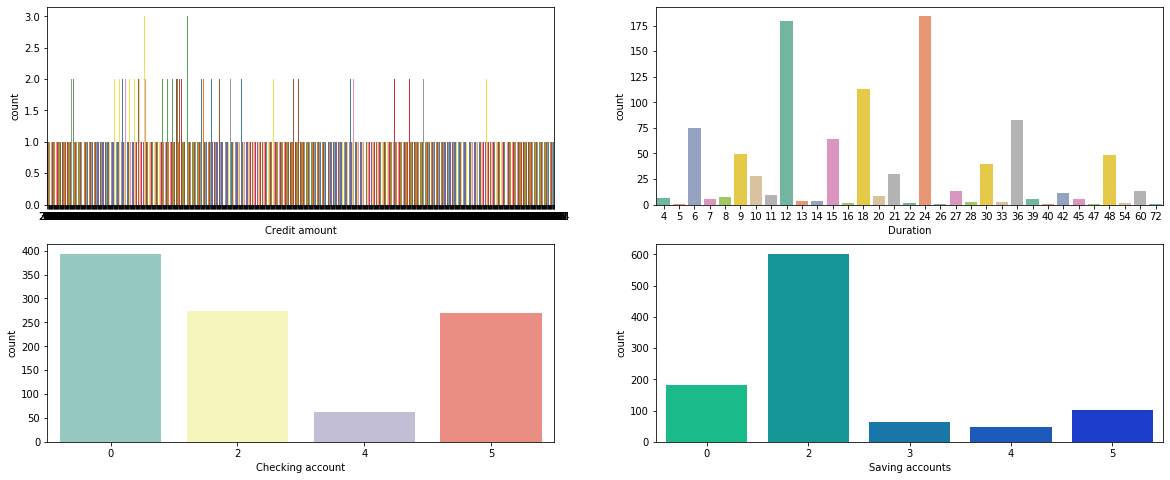

In [82]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,8))
sns.countplot('Credit amount',data=data,palette='Set1',ax=ax[0][0])
sns.countplot('Duration',data=data,palette='Set2',ax=ax[0][1])
sns.countplot('Checking account',data=data,palette='Set3',ax=ax[1][0])
sns.countplot('Saving accounts',data=data,palette='winter_r',ax=ax[1][1])

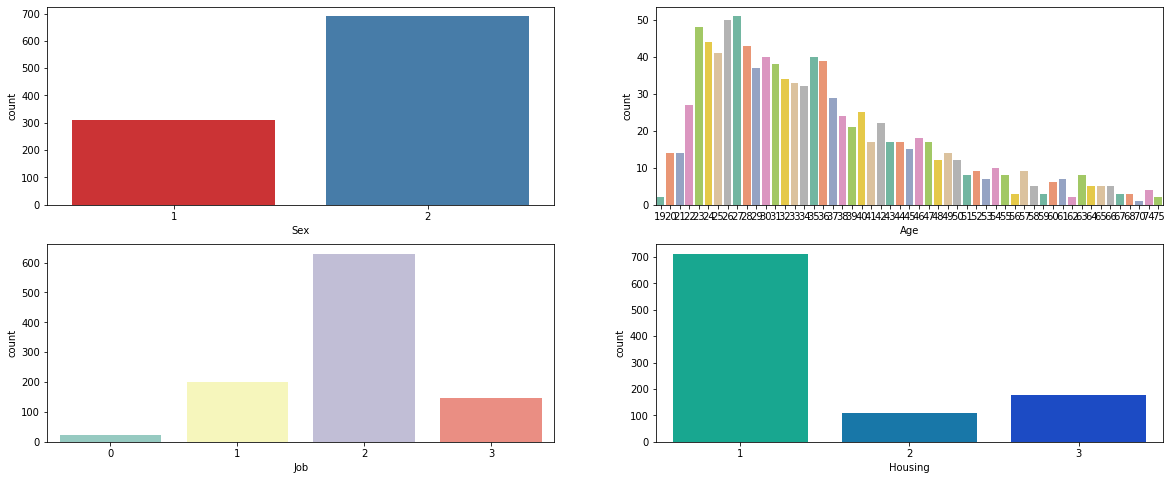

In [83]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,8))
sns.countplot('Sex',data=data,palette='Set1',ax=ax[0][0])
sns.countplot('Age',data=data,palette='Set2',ax=ax[0][1])
sns.countplot('Job',data=data,palette='Set3',ax=ax[1][0])
sns.countplot('Housing',data=data,palette='winter_r',ax=ax[1][1])

In [84]:
len(data["Duration"].unique())
len(data["Age"].unique())

53

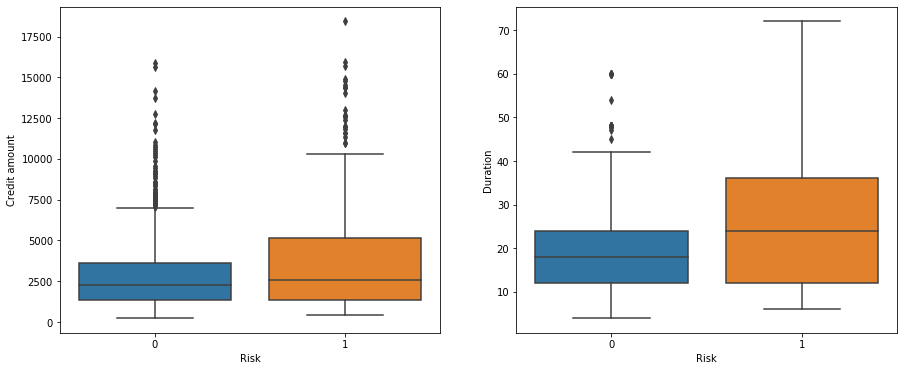

In [85]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.boxplot(y = 'Credit amount',x = 'Risk',data=data,ax=ax[0])
sns.boxplot(y = 'Duration',x = 'Risk',data=data,ax=ax[1])

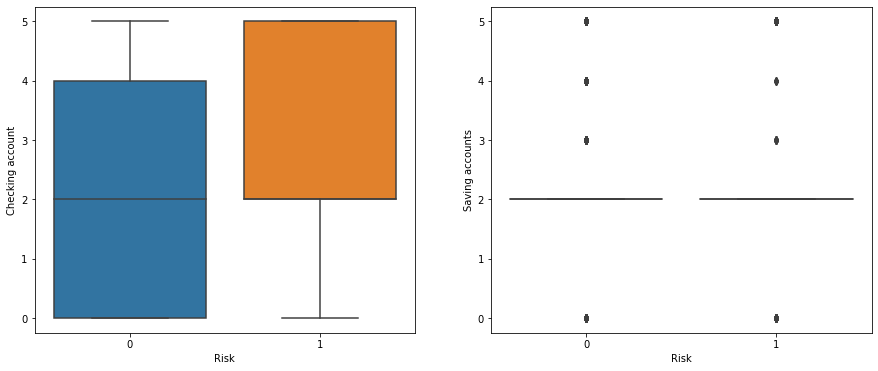

In [86]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.boxplot(y = 'Checking account',x = 'Risk',data=data,ax=ax[0])
sns.boxplot(y = 'Saving accounts',x = 'Risk',data=data,ax=ax[1])

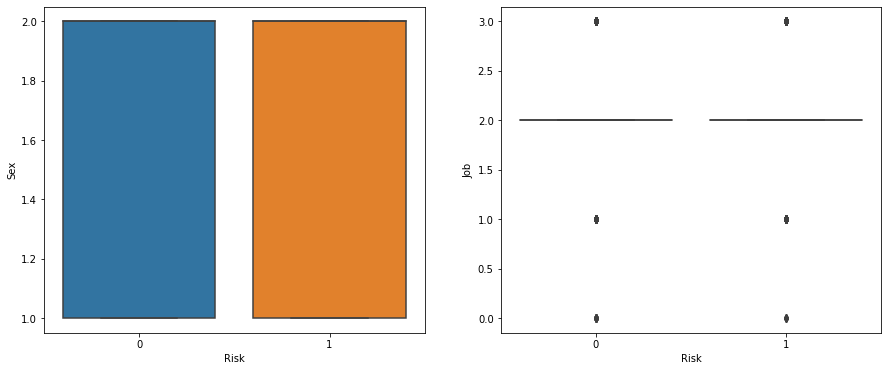

In [87]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.boxplot(y = 'Sex',x = 'Risk',data=data,ax=ax[0])
sns.boxplot(y = 'Job',x = 'Risk',data=data,ax=ax[1])

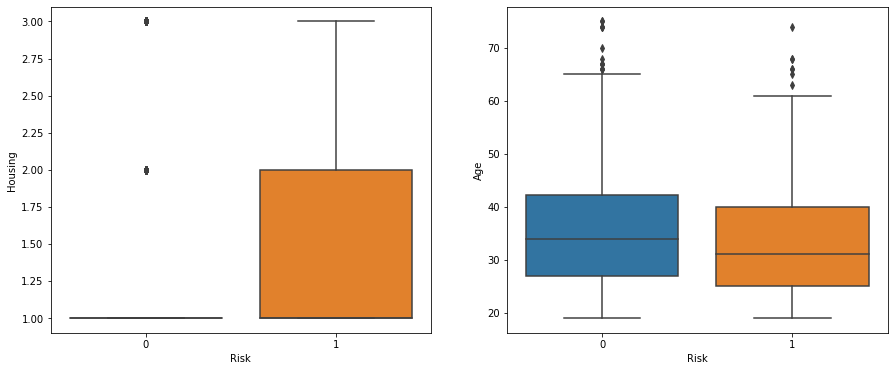

In [88]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.boxplot(y = 'Housing',x = 'Risk',data=data,ax=ax[0])
sns.boxplot(y = 'Age',x = 'Risk',data=data,ax=ax[1])

## Data Modelling

In [90]:
#Splitting the data into train and test
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [91]:
X, X_test, y, y_test = train_test_split(data.drop("Risk",axis=1), data["Risk"], test_size=0.2, random_state = 2) # 0.2 test_size means 20%

print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

(800, 9) (800,)
(200, 9) (200,)


#### We first divide the data into training and testing set and further model by dividing the training into training and validation set using cross validation method

## Feature Importance


In [92]:
functions=[chi2,f_classif]
for i in functions:
    bestfeatures = SelectKBest(score_func=i, k=9)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(i,'\n',featureScores.nlargest(10,'Score'))

<function chi2 at 0x1a25d21050> 
               Specs         Score
6     Credit amount  43311.803198
7          Duration    258.128028
5  Checking account     68.209685
0               Age     23.095729
3           Housing      6.941955
8           Purpose      5.780451
4   Saving accounts      3.045208
1               Sex      0.907341
2               Job      0.374765
<function f_classif at 0x1a25d21440> 
               Specs      Score
7          Duration  38.452539
5  Checking account  35.685179
6     Credit amount  18.146348
3           Housing  16.795064
1               Sex   7.151780
8           Purpose   6.610827
0               Age   6.334615
4   Saving accounts   3.326587
2               Job   1.630639


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') [0.17417933 0.02136423 0.03480174 0.05963122 0.07900352 0.11313198
 0.29392214 0.13657368 0.08739215]


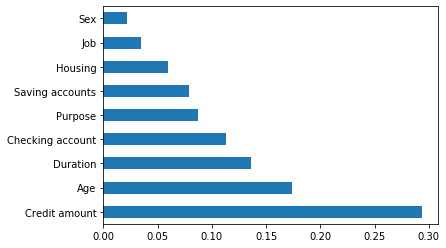

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False) [0.1592093  0.03200588 0.07309645 0.0504181  0.08755666 0.14883697
 0.18969647 0.1617344  0.09744577]


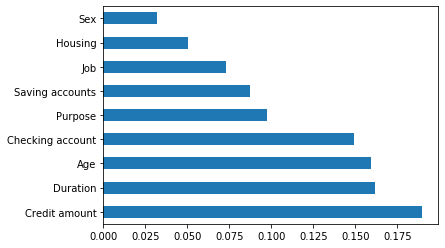

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) [0.18224738 0.03086811 0.05495546 0.03693293 0.06086479 0.14266463
 0.2576089  0.14605972 0.08779807]


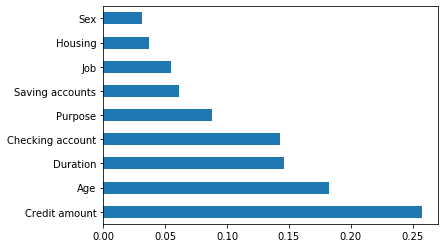

In [93]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC
import matplotlib.pyplot as plt
scaler = StandardScaler()
classifiers=[
        DecisionTreeClassifier(),
        ExtraTreesClassifier(),
        RandomForestClassifier()]


for i in classifiers:
    model = i 
    model.fit(X,y)
    print(model,model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers#plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.show()


    


## Classification

In [94]:
classifier=[
        KNeighborsClassifier(3),
    SVC(kernel="rbf"),
    RandomForestClassifier(),
    AdaBoostClassifier(),
   
    GaussianNB(),
    DecisionTreeClassifier(criterion='gini',random_state=0)]
for i in classifier:
    classifier_pipeline = Pipeline([('transformer', scaler), ('estimator', i)])
    kfold = model_selection.ShuffleSplit(n_splits=10, test_size=10, random_state=0)
    results = model_selection.cross_val_score(classifier_pipeline, X, y, cv=kfold)
    print("USING ALL VARIABLES",i)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    results
    plt.show()
for i in classifier:
    classifier_pipeline = Pipeline([('transformer', scaler), ('estimator', i)])
    kfold = model_selection.ShuffleSplit(n_splits=10, test_size=10, random_state=0)
    results = model_selection.cross_val_score(classifier_pipeline, X.drop(["Saving accounts","Job","Sex","Housing"],axis=1), y, cv=kfold)
    print("USING IMPORTANT VARIABLES",i)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    results
    plt.show()

USING ALL VARIABLES KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Accuracy: 64.000% (11.136%)
USING ALL VARIABLES SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Accuracy: 76.000% (14.283%)
USING ALL VARIABLES RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
             

              precision    recall  f1-score   support

           0       0.69      0.91      0.78       136
           1       0.40      0.12      0.19        64

    accuracy                           0.66       200
   macro avg       0.54      0.52      0.49       200
weighted avg       0.60      0.66      0.59       200



Text(0.5, 1, 'Confusion matrix')

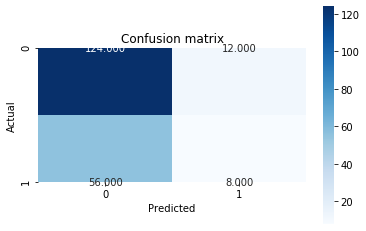

In [95]:
classifier_pipeline = Pipeline([('transformer', scaler), ('estimator',SVC(kernel="rbf") )])
y_pred = model_selection.cross_val_predict(classifier_pipeline, X_test,y_test)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
print(metrics.classification_report(y_test, y_pred))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       136
           1       0.51      0.39      0.44        64

    accuracy                           0.69       200
   macro avg       0.63      0.61      0.61       200
weighted avg       0.67      0.69      0.67       200



Text(0.5, 1, 'Confusion matrix')

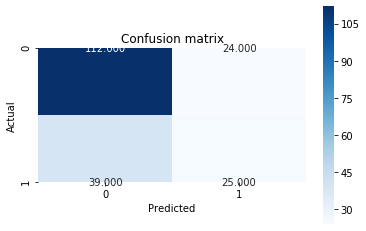

In [96]:
classifier_pipeline = Pipeline([('transformer', scaler), ('estimator',RandomForestClassifier() )])
y_pred = model_selection.cross_val_predict(classifier_pipeline, X_test,y_test)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
print(metrics.classification_report(y_test, y_pred))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')

### The best classification model so far is AdaBoostClassifier() with accuracy of 80%

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       136
           1       0.31      0.14      0.19        64

    accuracy                           0.62       200
   macro avg       0.49      0.50      0.47       200
weighted avg       0.56      0.62      0.58       200



Text(0.5, 1, 'Confusion matrix')

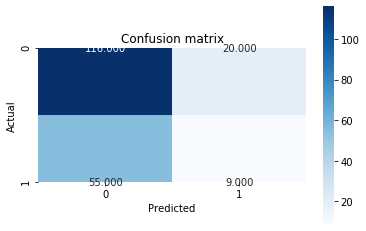

In [97]:
classifier_pipeline = Pipeline([('transformer', scaler), ('estimator',SVC(kernel="rbf") )])
y_pred = model_selection.cross_val_predict(classifier_pipeline, X_test.drop(["Saving accounts","Job","Sex","Housing"],axis=1),y_test)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
print(metrics.classification_report(y_test, y_pred))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       136
           1       0.52      0.47      0.49        64

    accuracy                           0.69       200
   macro avg       0.64      0.63      0.63       200
weighted avg       0.68      0.69      0.69       200



Text(0.5, 1, 'Confusion matrix')

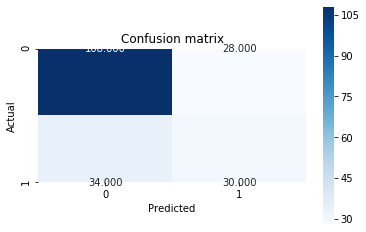

In [98]:
classifier_pipeline = Pipeline([('transformer', scaler), ('estimator',AdaBoostClassifier() )])
y_pred = model_selection.cross_val_predict(classifier_pipeline, X_test.drop(["Saving accounts","Job","Sex","Housing"],axis=1),y_test)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
print(metrics.classification_report(y_test, y_pred))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')

## Clustering

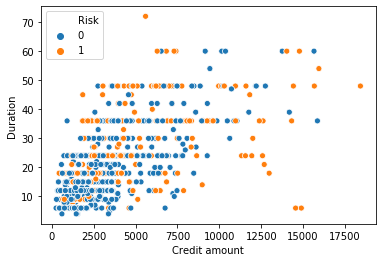

In [99]:
sns.scatterplot(x = data['Credit amount'], y = data['Duration'],hue=data["Risk"])

In [100]:
scaler = StandardScaler()
scaler.fit(data)
x_scaled = scaler.transform(data)

In [101]:
x_scaled.shape

(1000, 10)

0.002664649146598528
0.7065572891129867


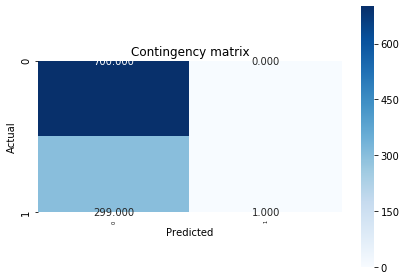

In [102]:
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
methods=["single","complete","average"]

clustering = linkage(x_scaled[:,:8], method = "single", metric = "euclidean")
dendrogram = sch.dendrogram(sch.linkage(x_scaled[:,:8], method="single"))
#     clustering = linkage(x_scaled, method = i, metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
data['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(metrics.adjusted_rand_score(data['Risk'], data['clusters']))
print(metrics.silhouette_score(data.drop("Risk",axis=1), data['clusters'], metric = "euclidean"))

    

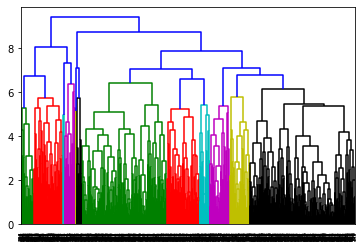

In [103]:
clustering = linkage(x_scaled[:,:8], method = "complete", metric = "euclidean")
dendrogram = sch.dendrogram(sch.linkage(x_scaled[:,:8], method="complete"))

0.087297208454185
0.19749313398900006


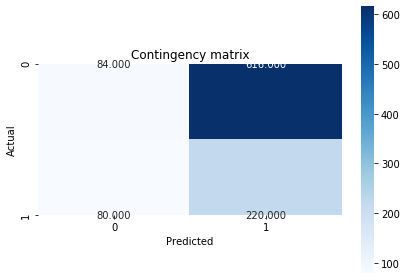

In [175]:
clusters = fcluster(clustering, 2, criterion = 'maxclust')
data['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(metrics.adjusted_rand_score(data['Risk'], data['clusters']))
print(metrics.silhouette_score(x_scaled[:,:8], data['clusters'], metric = "euclidean"))

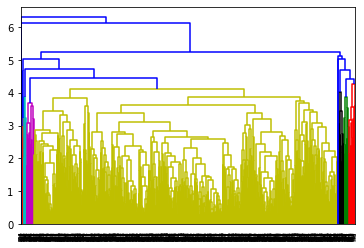

In [176]:
clustering = linkage(x_scaled[:,:8], method = "average", metric = "euclidean")
dendrogram = sch.dendrogram(sch.linkage(x_scaled[:,:8], method="average"))

0.002664649146598528
0.7005169820467209


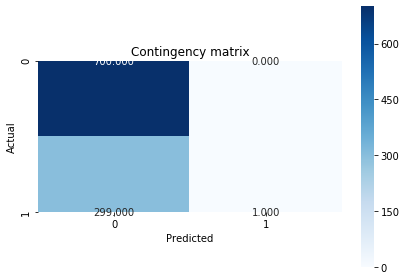

In [177]:
clusters = fcluster(clustering, 2, criterion = 'maxclust')
data['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(metrics.adjusted_rand_score(data['Risk'], data['clusters']))
print(metrics.silhouette_score(data.drop("Risk",axis=1), data['clusters'], metric = "euclidean"))

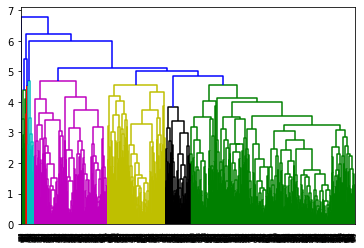

In [178]:
clustering = linkage(x_scaled[:,:8], method = "weighted", metric = "euclidean")
dendrogram = sch.dendrogram(sch.linkage(x_scaled[:,:8], method="weighted"))

0.002664649146598528
0.7005169820467209


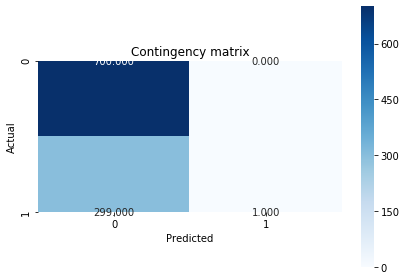

In [179]:
clusters = fcluster(clustering, 2, criterion = 'maxclust')
data['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(metrics.adjusted_rand_score(data['Risk'], data['clusters']))
print(metrics.silhouette_score(data.drop("Risk",axis=1), data['clusters'], metric = "euclidean"))

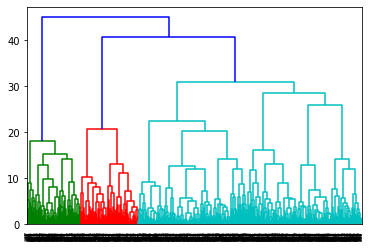

In [180]:
clustering = linkage(x_scaled[:,:8], method = "ward", metric = "euclidean")
dendrogram = sch.dendrogram(sch.linkage(x_scaled[:,:8], method="ward"))

0.08222874585351425
0.5418207914616913


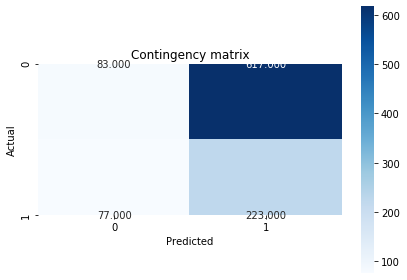

In [181]:
clusters = fcluster(clustering, 2, criterion = 'maxclust')
data['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(metrics.adjusted_rand_score(data['Risk'], data['clusters']))
print(metrics.silhouette_score(data.drop("Risk",axis=1), data['clusters'], metric = "euclidean"))

### KMeans


In [182]:
from sklearn.cluster import KMeans, DBSCAN
clustering = KMeans(n_clusters = 3, init = 'random', n_init = 1, random_state = 2).fit(x_scaled[:,:8])

In [183]:
clustering.cluster_centers_

array([[-0.25558983, -1.49191369, -0.19259249,  0.28404644,  0.04730907,
        -0.00331591, -0.39328772, -0.34766017],
       [ 0.1091416 ,  0.67028006, -0.1191387 , -0.15910606,  0.03445127,
        -0.07506346, -0.35530399, -0.33654226],
       [ 0.06261289,  0.27198121,  0.61422179,  0.03688931, -0.16548116,
         0.21616225,  1.56969347,  1.4508245 ]])

In [184]:
clusters = clustering.labels_
print(clusters)
data['clusters'] = clusters

[1 2 1 2 1 2 1 2 1 2 0 2 0 1 0 0 1 2 2 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 0 2 2
 1 1 1 1 1 1 2 2 0 1 0 1 0 1 2 1 1 1 1 2 2 0 0 1 1 2 2 0 1 0 1 1 0 2 1 1 2
 2 1 2 1 2 1 0 1 0 0 1 0 0 2 1 1 1 1 0 1 1 2 0 1 1 2 1 2 0 1 1 2 2 1 2 1 1
 0 1 2 1 2 2 0 0 1 0 0 1 1 0 1 1 1 1 0 2 2 1 1 2 0 2 1 1 0 1 2 1 1 0 2 0 0
 2 1 1 1 2 0 2 0 1 1 1 1 1 0 1 2 1 1 0 0 0 1 1 0 0 1 1 2 1 1 1 1 2 2 1 1 1
 1 0 1 1 0 1 2 1 1 2 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 0 1 2 1 0 1 0
 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 1 0 1 0 1 2 0 0 1 1 1 1 0 0 0 0 1 1 2 1 1 0
 0 1 0 1 0 1 1 2 0 2 1 1 0 2 2 2 1 0 1 0 1 1 1 1 1 1 2 2 2 0 1 1 2 2 2 2 2
 0 1 1 1 0 0 1 1 2 1 0 1 0 1 2 1 0 1 1 1 1 0 1 0 2 1 1 1 0 1 1 0 2 1 2 0 2
 2 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 2 1 0 1 1 0 1 1 1 1 0 1 0
 1 1 0 2 2 2 1 1 2 0 1 2 0 1 1 0 0 2 1 0 1 0 2 0 1 2 0 1 1 0 1 1 2 1 1 1 1
 1 1 1 0 2 1 1 0 2 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 2 1 1 1 1 1 0 1 0 1 0 1 1
 2 0 0 1 0 1 2 0 1 1 1 0 1 1 0 1 2 1 0 1 1 1 0 2 0 1 1 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 1 0 1 1 1 2 0 

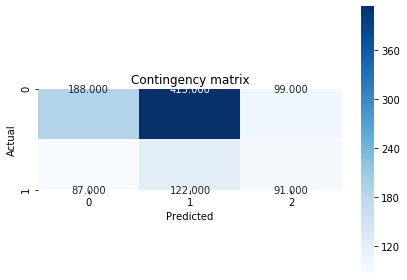

In [185]:
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [144]:
print(metrics.adjusted_rand_score(data['Risk'], data['clusters']))
print(metrics.silhouette_score(data.drop("Risk",axis=1), data['clusters'], metric = "euclidean"))

0.059648067327769075
0.047471056446473175


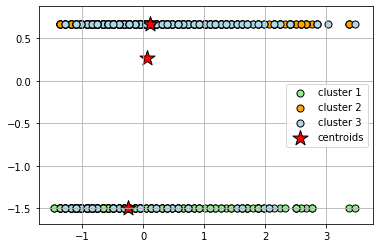

In [186]:
plt.scatter(
    x_scaled[:,:8][clusters == 0, 0], x_scaled[:,:8][clusters == 0, 1],
    s=50, c='lightgreen',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x_scaled[:,:8][clusters  == 1, 0], x_scaled[:,:8][clusters  == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x_scaled[:,:8][clusters  == 2, 0], x_scaled[:,:8][clusters  == 2, 1],
    s=50, c='lightblue',
    marker='o', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
   clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [187]:
clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10).fit(x_scaled[:,:8])

In [188]:
clustering.cluster_centers_

array([[ 6.94796575e-02,  2.51515265e-01,  5.76519001e-01,
         5.17536661e-04, -1.31224358e-01,  1.77453900e-01,
         1.26137251e+00,  1.25257373e+00],
       [-2.35319322e-02, -8.51852237e-02, -1.95260117e-01,
        -1.75283501e-04,  4.44441265e-02, -6.01015215e-02,
        -4.27211842e-01, -4.24231798e-01]])

In [189]:
clusters = clustering.labels_
print(clusters)

[1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1
 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0
 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 

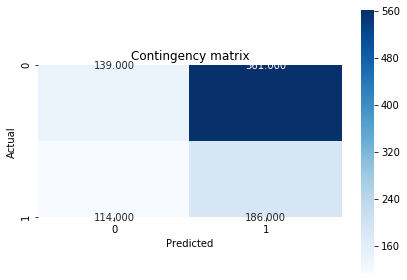

In [190]:
data['clusters'] = clusters
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [191]:
print(metrics.adjusted_rand_score(data['Risk'], data['clusters']))
print(metrics.silhouette_score(data.drop("Risk",axis=1), data['clusters'], metric = "euclidean"))

0.08624074870648217
0.5674388737280642


### DBSCAN

In [192]:
clustering = DBSCAN(eps = 1, min_samples = 5, metric = "euclidean").fit(x_scaled[:,:8])

In [193]:
clusters = clustering.labels_
print(clusters)
data['clusters'] = clusters

[-1 -1  0 -1 -1 -1  1 -1 -1  5 -1 -1  2 -1  3 -1  4 -1 -1  1  1 -1 -1 -1
  4  0  0 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 10  1 -1 -1 -1 -1  1 -1
 -1  2 -1  5  1  4 -1 -1 -1 -1 -1 -1  1  6 -1 -1  2  4  2  1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1  0 -1  2 -1 -1  1  1  1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1  2 11 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  9 -1 -1
  2 -1 -1 -1 -1  1  0  1 -1  2 -1  1  0 -1 -1 -1 -1 -1  6 -1 -1 -1 -1  1
  2 -1  2 -1  1  1 -1  1  1 -1 -1  3 -1  0  1 -1  1  2  1 -1 -1  1  2 -1
 -1  1 12  2 -1  1  1 -1  1  1 -1 -1 -1  5 -1  1  1  1 -1 -1 -1  2 -1 -1
  1 -1 -1 -1  2 -1 -1 -1  1  0  1 11  0 -1  1  1 -1  1  4 -1 -1 -1  4 -1
  1  1 -1 -1  7  9  1  4  1  1 -1 -1  1 -1  1 -1  1  7  0 -1 -1 -1  2  1
 -1  1 -1  2 -1  1  1 -1  1  3 -1 -1  2  1  6 -1  0 -1  2 -1  1 -1 -1 -1
  0  1 -1  2 -1  4  4 -1 -1 -1 -1  1  2 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1  2 -1 -1  1
  2  7 -1  1  0 -1  1 13  5  1 -1 -1  2  0 -1  2  1

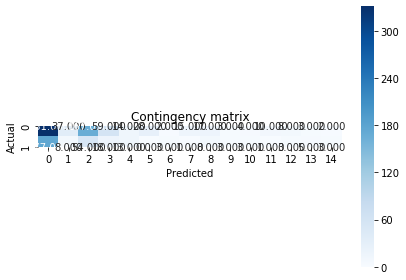

In [194]:
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [195]:
print(metrics.adjusted_rand_score(data['Risk'], data['clusters']))
print(metrics.silhouette_score(data.drop("Risk",axis=1), data['clusters'], metric = "euclidean"))

-0.02123127433833385
-0.5459008408464303


### Clustering on other variables like   housing, Checking account ,Saving account

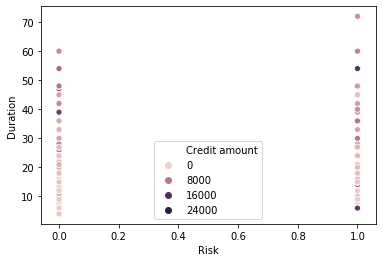

In [155]:
sns.scatterplot(x = data['Risk'], y = data['Duration'],hue=data["Credit amount"])

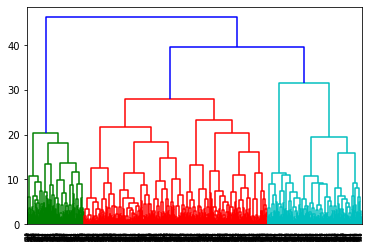

In [199]:
#Clustering on Sex
clustering = linkage(x_scaled[:,[0,2,3,4,5,6,7,8,9]], method = "ward", metric = "euclidean")
dendrogram = sch.dendrogram(sch.linkage(x_scaled[:,[0,2,3,4,5,6,7,8,9]], method="ward"))

-0.023694532505073296
0.5777423543796368


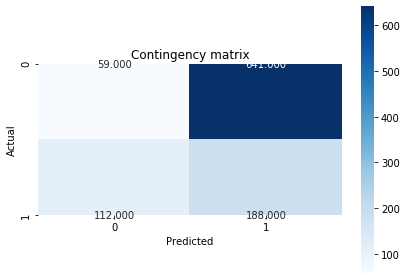

In [201]:
clusters = fcluster(clustering, 2, criterion = 'maxclust')
data['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(metrics.adjusted_rand_score(data['Sex'], data['clusters']))
print(metrics.silhouette_score(data.drop("Sex",axis=1), data['clusters'], metric = "euclidean"))

[Text(0, 0.5, 'Age'),
 Text(0.5, 0, 'Duration'),
 Text(0.5, 1.0, 'German Credit Data')]

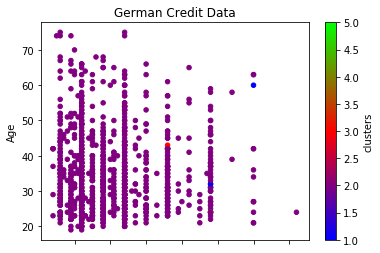

In [197]:
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = "Duration", y = "Age", c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'German Credit Data', xlabel = 'Duration', ylabel = 'Age')

[Text(0, 0.5, 'Age'),
 Text(0.5, 0, 'Duration'),
 Text(0.5, 1.0, 'German Credit Data')]

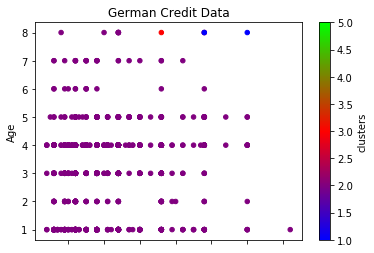

In [198]:
ax = data.plot(kind = 'scatter', x = "Duration", y = "Purpose", c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'German Credit Data', xlabel = 'Duration', ylabel = 'Age')

In [204]:
clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10).fit(x_scaled[:,[0,2,3,4,5,6,7,8,9]])
clustering.cluster_centers_
clusters = clustering.labels_

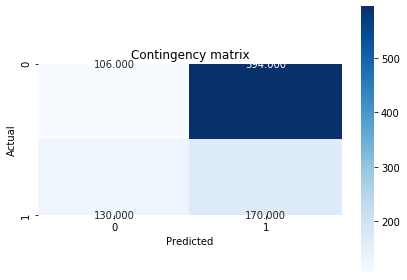

In [205]:
data['clusters'] = clusters
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [206]:
print(metrics.adjusted_rand_score(data['Sex'], data['clusters']))
print(metrics.silhouette_score(data.drop("Sex",axis=1), data['clusters'], metric = "euclidean"))

-0.024449448912137198
0.5647998683538052


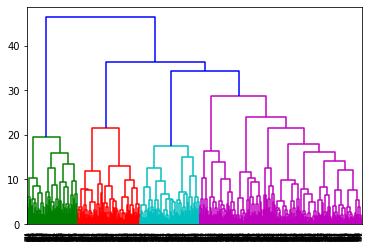

In [210]:
clustering = linkage(x_scaled[:,[0,1,2,4,5,6,7,8,9]], method = "ward", metric = "euclidean")
dendrogram = sch.dendrogram(sch.linkage(x_scaled[:,[0,1,2,4,5,6,7,8,9]], method="ward"))

-0.020339823477447887
0.6089017836009292


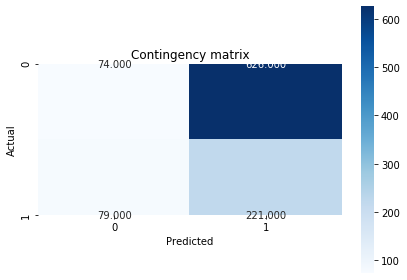

In [211]:
clusters = fcluster(clustering, 2, criterion = 'maxclust')
data['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(metrics.adjusted_rand_score(data['Sex'], data['clusters']))
print(metrics.silhouette_score(data.drop("Sex",axis=1), data['clusters'], metric = "euclidean"))

In [207]:
clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10).fit(x_scaled[:,[0,1,2,4,5,6,7,8,9]])
clustering.cluster_centers_
clusters = clustering.labels_

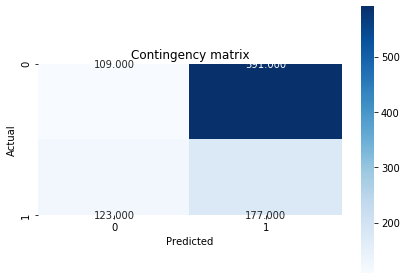

In [208]:
data['clusters'] = clusters
cont_matrix = metrics.cluster.contingency_matrix(data['Risk'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [209]:
print(metrics.adjusted_rand_score(data['Sex'], data['clusters']))
print(metrics.silhouette_score(data.drop("Sex",axis=1), data['clusters'], metric = "euclidean"))

-0.035109927840353675
0.5690325918140144


<Figure size 4356x3996 with 0 Axes>

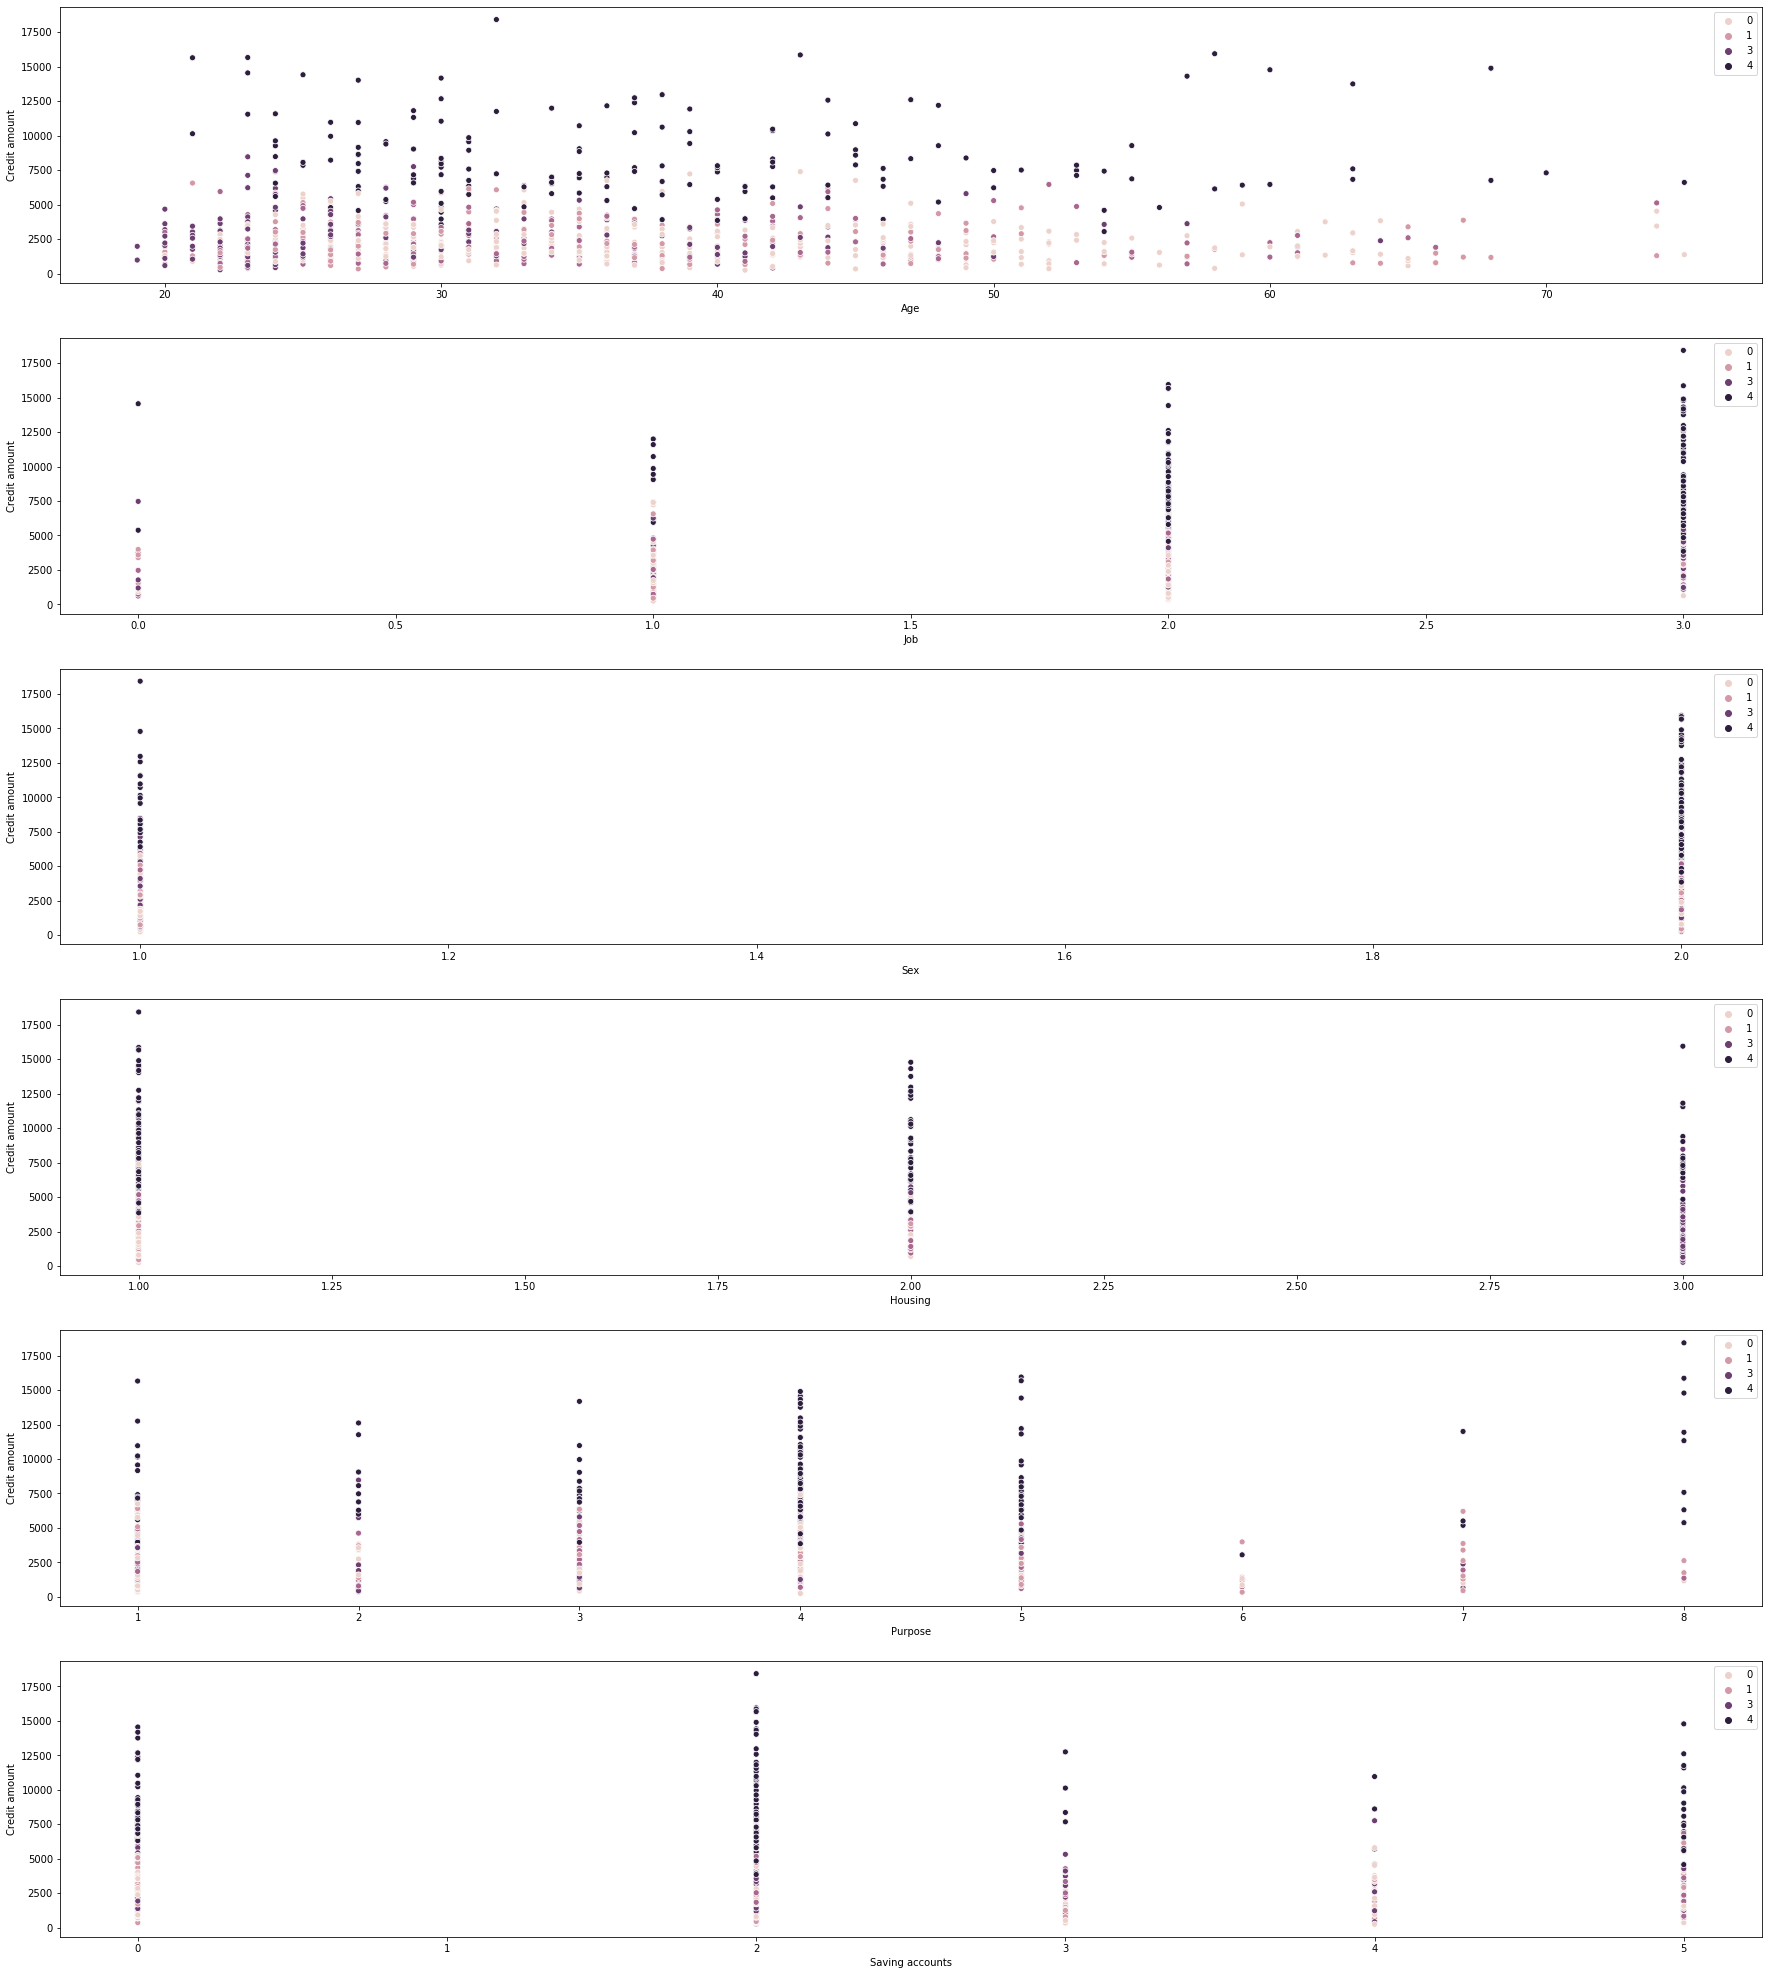

<Figure size 4356x3996 with 0 Axes>

In [72]:
plt.figure( figsize=(30.5,35.5))
plt.subplot(6, 1, 1)
sns.scatterplot(x="Age",y="Credit amount",hue=clusters,data=data)
plt.subplot(6, 1, 2)
sns.scatterplot(x="Job",y="Credit amount",hue=clusters,data=data)
plt.subplot(6, 1,3)
sns.scatterplot(x="Sex",y="Credit amount",hue=clusters,data=data)
plt.subplot(6, 1,4)
sns.scatterplot(x="Housing",y="Credit amount",hue=clusters,data=data)
plt.subplot(6, 1, 5)
sns.scatterplot(x="Purpose",y="Credit amount",hue=clusters,data=data)
plt.subplot(6, 1, 6)
sns.scatterplot(x="Saving accounts",y="Credit amount",hue=clusters,data=data)
plt.figure( figsize=(60.5,55.5))
